# Lecture notes for 08 27 2020

# Today's Items of Business:

## Taking a big step back to define some terms and concepts!

## Challenge time: Apply some of this stuff!

In [2]:
import numpy as np                          # I use this for maths and sometimes arrays.
                                            # "np" is just an abbreviation since we call this package so often!
import pylab                                # I use this for arrays and plotting sometimes
import matplotlib as plt                    # Standard plotting package
import scipy

from astropy import units as u              # This one helps with unit conversion



                                            # Super important!! 
                                            # This embeds plots in the Jupyter window 
                                            # (instead of showing them as pop-ups)
%matplotlib inline                             

plt.rc('font', family='sans-serif')  # Set plot fonts
plt.rc('text', usetex=True)      
#plt.rc('text', usetex=False)        # This is a quick fix if you don't have latex on your computer



# Glossary of Fundamental Concepts

### Let's take a step back from this chapter and break this class down to a more fundamental basis:

When we talk about the interstellar medium, we are dealing with macroscopic systems of microscopic particles (and photons, which are a little more complicated). Despite the incredible difference in densities between terrestrial gasses and interstellar gasses, we are still talking about systems in which the individual components/particles interact regularly through both short-range and long-range forces. 

While Draine Ch 2 dealt with defining ways to characterize the frequencies of these interactions, Draine Ch 3 is all about the energies & specifically the thermodynamics. This means considering a lot of different distributions of energies in our system of gas particles, from macroscopic (like translational kinetic energy) to microscopic (where the internal energy states are now small, so much so that they are quantized).

Throughout this course we will focus on different energy regimes, and the different relative importance of long-range forces for different types of particles/conditions. This will help us define some of the different subsets of the ISM we will deal with in this course (plasmas, ionized gas, neutral/molecular gas, and dust). 


## 1: Number density -- $n$

A fundamental quantity when talking about a gas is the number density: the number of particles in a specified volume. In chemistry, a related concept would be the concentration of a given reactant. 

We can define the number density $n$ in several ways: 

(1) $n = \frac{N}{V}$ where $N$ is the total number of particles and $V$ is the volume.

Note that (for whatever the reason) very common volume units encountered in astronomy are cm$^{-3}$.

We can also relate a number density back to the mass density $\rho$:

(2) $n = \frac{\rho}{\mu m_H}$ Here I am making this expression extremely general, and able to encompass a heterogeneous mixture of particles for which the mean particle mass is given by $\mu m_H$. 

This requires defining a new quantity: The mean molecular weight $\mu$.

## 2: Mean Molecular Weight -- $\mu$

The mean molecular weight is a dimensionless quantity that can be expressed as

$\mu = \frac{\bar{m}}{m_H}$

$\bar{m}$ can be either the mass of a single particle, or the average mass of an ensemble of particles. As an example, let's calculate the mean molecular mass of air. 

If we know the concentration of different species by number, we can write:

$\bar{m} = \%A(m_A) + \%B(m_B) + \%C(m_C) + ... + \%N(m_N)\; /\; 100\%$

(Note that if instead you know the _mass fraction_ of a species, your math will be more complicated!)

For dry air, the concentrations of the most abundant species are:

N$_2$: 78.08%

O$_2$: 20.95%

Ar: 0.934%

Taking the masses of these species, we can compute

$\bar{m} = 0.7808(28.013\; \mathrm{amu}) + 0.2095(31.999\; \mathrm{amu}) + 0.00934(39.938\; \mathrm{amu})$

$\bar{m} = 28.9\; \mathrm{amu}$

The mean molecular weight of air is then 

$\mu = \frac{28.9\; \mathrm{amu}}{1.00784\; \mathrm{amu}}$

$\mu = 28.9$

Given this, and the fact that the density ($\rho$) of dry air is 1.225 kg m$^{-3}$, **what is the number density of the air you are breathing right now?**

In [11]:
#Calculate Number Density

def mass_to_number(mu,rho,rho_units):
    m_H = 1.67e-27 * u.kg
    n_dens = rho * rho_units / mu / m_H
    return n_dens


n = mass_to_number(28.9,1.225,u.kg/u.m/u.m/u.m)

print(n.si)
print(n.cgs)

2.5381762426703685e+25 1 / m3
2.5381762426703688e+19 1 / cm3


## 3: Collisional Cross section -- $\sigma$

Now that we have defined the concentration of particles that are present in our gas, we have to consider the possibility (inevitability) that they will interact. To do this, we need to know not just their number density, but a typical particle size. If there were no long-range forces to consider, this would just be determined by a physical radius of the interacting particles (the hard sphere approximation). 

In this case, we can define a purely geometric collisional cross section (essentially, the cross-sectional area in space taken up by a particle as it speeds around in some direction). To consider whether a collision will occur, we have to determine the likelihood that a particle will come into contact, which we define as a distance less than the sum of the radius of both particles. For identical particles:

$\sigma = \pi (2r)^2 = \pi d^2$ where $\sigma$ has the expected units of area.

If the particles are not identical, we can more generally state

$\sigma_{AB} = \pi (r_A + r_B)^2$

However, in many cases we will consider, the effective particle radius is actually determined by the distance at which an interaction occurs due to a long-range force (resulting in the particle substantially deviating from its original course). In these cases, the collisional cross section becomes substantially more complicated (and illustrating cases in which this is true is one of the main purposes of Draine Ch. 2). 

## 4: Mean free Path -- $\tau$

The mean free path $\tau$ is the distance a typical particle in a gas travels before undergoing an encounter (collision) with another particle. 

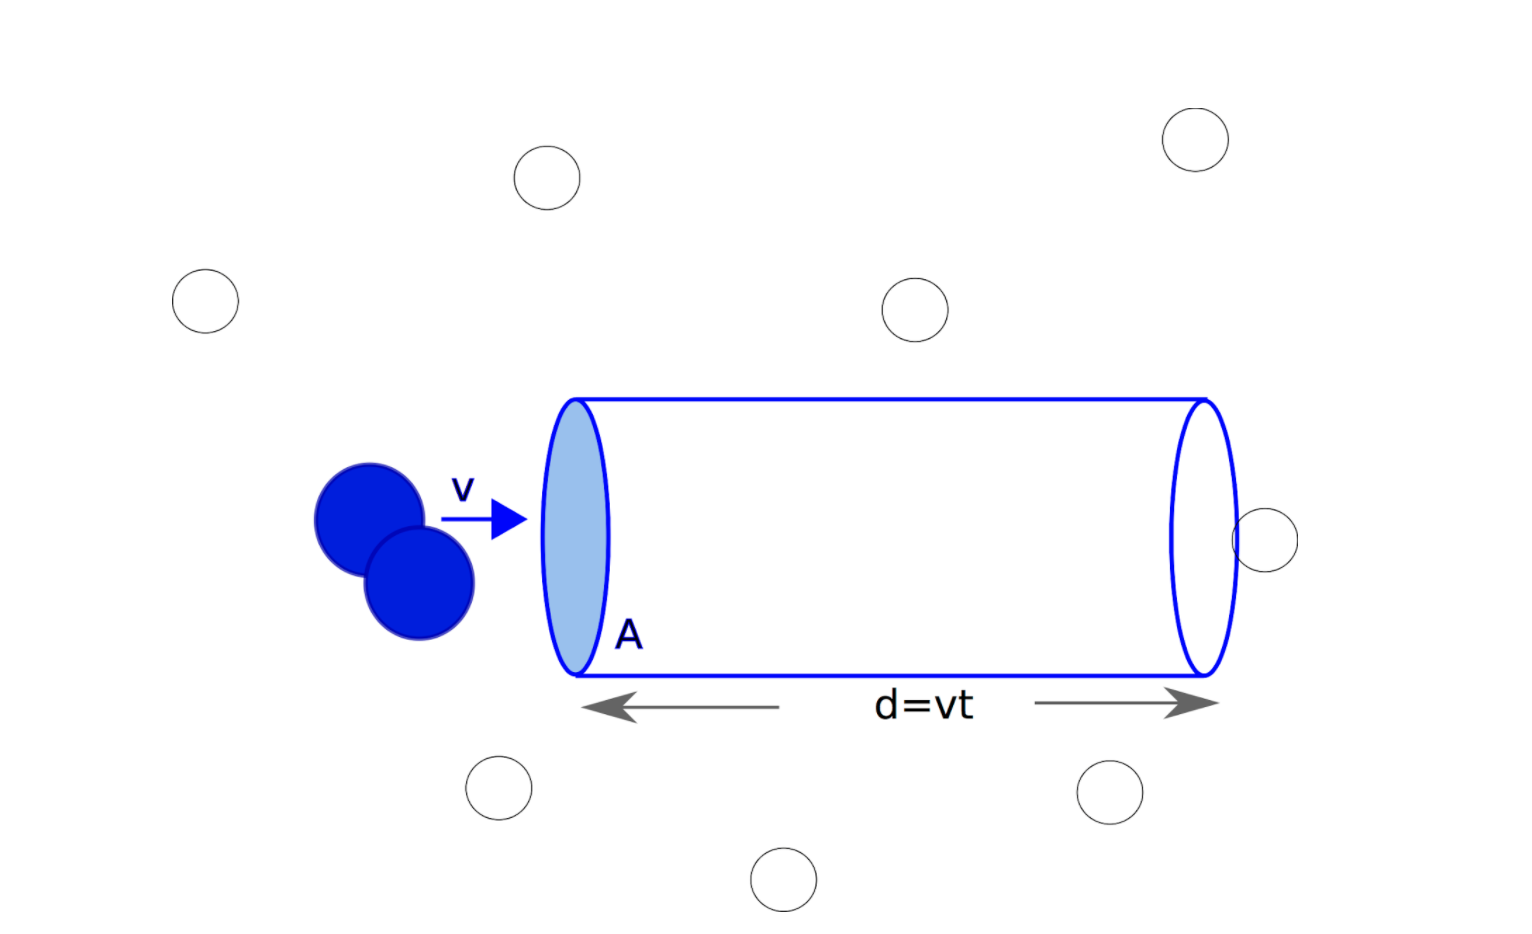

This quantity has units of length, and geometrically (using the figure above, in which the area $A$ is essentially equivalent to our collisional cross section $\sigma$) we can express it as 

$\tau = \frac{1}{n\sigma}$

Essentially, we are looking for a distance $d=\tau$ that the particle must travel in order for the volume it sweeps out to contain a single particle.

Assuming that a typical air molecule in our atmosphere has a radius of 0.1 nm, what is its mean free path?

In [14]:
#Calculate Mean Free Path

def sigma_cross(radius, length_unit):
    sigma = np.pi * (2*radius*length_unit)**2
    return sigma

def mean_free_path(n_dens,sigma,length_unit):
    tau = 1 / n_dens / sigma * length_unit
    return tau

sig = sigma_cross(0.1*1e-9,u.m)

mfp = mean_free_path(n.si.value,sig.value,u.m)

print(mfp)

3.135222456507813e-07 m


## 5: Two-body Collisional Rate Coefficient --  $\langle \sigma v \rangle$

For a two-body interaction, we can describe the rate of collisions *per volume* as 

$R_{coll} = n_A n_B \langle \sigma v \rangle$  where $v$ is the typical relative velocity of the particles

This has collision rate has units of per volume, per time (e.g., cm$^{-3}$ s$^{-1}$)

(Note that you will sometimes see this variable written as $Z$, but we will write it as $R$ to avoid confusion with the partition function, discussed later). 

In some cases, you may want to know the rate of collisions experienced by a single particle (for example, relating back to the mean free path, which described how far a single particle can travel before undergoing a collision). In this case, we can say:

$R_{coll,A} = n_B \langle \sigma v \rangle$ with units of collisions per time (e.g., s$^{-1}$)

The relatively simple forms of these equations will re-appear over and over again, as the two-body collisional rate coefficient is a fundamental component of rates like chemical reaction rates and recombination rates). 

More generally, you will typically see the rate equation for some process given as 

$R_{process} = k_r n_A n_B $ where $k_r$ is a generic rate coefficient (which generally encapsulates $\langle \sigma v \rangle$ along with any other dependencies)

The collisional rate is parameterized by the rate coefficent $\langle \sigma v \rangle$ which has units of m$^3$ s$^{-1}$. The rate coefficient can be thought of as the volume in which collisions can occur that particles take up as they move around in the gas. Multiplying by the number densities of both particles then gives the rate at which these particle motions (given their effective sizes) result in a collision. 

Practically, this parameterization allows for complex temperature dependencies to be bundled together into a single "constant". Again, a number of forms of $\langle \sigma v \rangle$ taking into account interactions via long-range forces are given in Draine Ch 2. For now, we will focus on where exactly this temeprature dependency arises in the 'hard sphere' approximation, since so far the only variable we have seen apart from a geometrically-determined cross section is the particle velocity $v$. 

## 6: Maxwell-Boltzmann Statistics and Kinetic Temperature --  $T_{kin}$

For our purposes in studying gas in the interstellar medium, the gas will essentially always be well-described by Maxwell-Boltzmann statistics. That is to say:

(1) Individual gas particles are distinguishable (Unlike for Bose-Einstein statistics, in which individual particles are not distinguishable)

(2) There is no limit on the number of particles in a system that can share the same internal energy state (Unlike for Fermi statistics, in which each energy state of the system can be occupied by at most one particle).

From the kinetic theory of gases, assuming that the motion of the particles is homogeneous in 3 dimensions, we can then write a probability function that describes the likelihood of finding a particle in our system having a velocity $v$:

$f(v)\; dv = \left( \frac{\bar{m}}{2\pi kT}\right)^{3/2} 4\pi v^2\; \exp \left( \frac{-\bar{m}v^2}{2kT}\right)$ where $k$ is the Boltzmann constant.

By definition, the temperature in this equation is the gas kinetic temperature $T_{kin}$.

This distribution has some similarities with a Gaussian, and its mean value can be similarly used to describe the typical random speed of a particle. This is often called the thermal velocity, and it can be expressed as 

$v_{th} = \sqrt \frac{8 kT }{\pi \bar{m}}$

Using this definition of thermal velocity, calculate the typical time between collisions for an air molecule in the earth's atmosphere. 

In [27]:
#Calculate thermal velocity

def v_thermal(Temp,Temp_units,m_avg,m_units):
    v_therm = np.sqrt(8*1.38e-23*u.kg*u.m*u.m/u.s/u.s/u.K *Temp * Temp_units/(np.pi * m_avg *m_units))
    return v_therm

v_th = v_thermal(300,u.K,28.9*1.67e-27, u.kg)

print(v_th.si)

#Calculate collision time scale

def t_collision(v_therm,v_units,mfp, mfp_units):
    t_coll = mfp / v_therm * mfp_units/v_units
    return t_coll

t_c = t_collision(v_th.value,v_th.unit,mfp.value,mfp.unit)
print(t_c.si)


467.3724092284515 m / s
6.708189004317791e-10 s


## 7: Internal Energy States

So far we have been considering our system of gas particles relatively macroscopically, looking at their speeds and interaction frequency. 

However, now we have to consider that collisions between gas particles are not perfectly elastic, and may not only alter the trajectory of a particle, but may change its internal energy state (or even result in some combination of the two particles). 

Internal energy states of atoms and molecules are discrete and quantized values.

For individual atoms, internal energy states are simply (or not so simply) governed by electron orbitals. 

For molecules, the internal energy states become more complicated. In addition to the electronic energy states from the electron orbitals of each atom in the molecule, the molecule also has a set of rotational energy states due to the quantization of angular momentum around non-degenerate rotational axes of the molecule. Finally, depending on the complexity of the molecule, it will have one set (or many sets) of vibrational energy states due to different vibrational modes (bending and stretching and overtones thereof) of the intramolecular bonds. 

Details of these different states, including quantum selection rules, will be discussed later in the semester. 


## 8: Boltzmann Distribution and Excitation Temperature -- $T_{ex}$


For gas obeying Boltzmann statistics, we can describe the probability $p$ that a particle in the gas is in a given internal energy state $i$ as 

$p_i \propto \exp \left(- \frac{E(i)}{kT} \right ) $ where $p_i$ is the probability of being in state $i$ and E(i) is the energy of the $i^{th}$ state. 

We can construct a ratio of probabilities for the population of two different energy states as:

$\frac{p_i}{p_j} = \frac{g_i}{g_j} \exp \left(- \frac{E(j) - E(i)}{kT} \right ) $ where $g_i$ and $g_j$ are the degeneracies of each state 

(basically, the degeneracy is the number of distinct quantum states of the atom/molecule having identical energies-- states which, under 'typical' conditions, are observationally indistinguishable)


The ratio of probabilities can also be related to the number of atoms/molecules in each state, and this equation can then be rewritten as

$\frac{N_i}{N_j} = \frac{g_i}{g_j} \exp \left(- \frac{E(j) - E(i)}{kT_{ex}} \right ) $

This equation (I will sometimes refer to it as the Boltzmann Equation) defines the observed Excitation Temperature ($T_{ex}$) of a system. 



## 8: Partition Functions -- Z

To exactly determine the probability that an atom (or molecule) is in a specific energy state requires knowledge of the full probability distribution for all allowed energy states of the atom. This quantity is called the Partition Function. We can define the partition function by requiring that the sum of the probabilities of occupying all possible internal energy states $s$ of the atom is 1:

$\sum_{s} p_i = 1$ 

This then allows us to normalize our original expression for $p_i$:

$p_i = \frac{1}{\sum_{s} \exp \left(- \frac{E(s)}{kT} \right )} \exp \left(- \frac{E(i)}{kT} \right )$

We then define this normalizing factor as the partition function:

$Z = \sum_{s} \exp \left(- \frac{E(s)}{kT} \right )$ 


Note that the partition function is separable into different components (e.g., the probabilities for the occupation of the electronic, rotational, and vibrational energy states):

$Z_{int} = Z_{e} Z_{rot} Z_{vib}$

As we will (probably?) see later, these can be written as:

$Z_{e} = \sum_{s} \exp \left(- \frac{E_e(s)}{kT} \right )$

$Z_{rot} = \sum_{J=0}^{\inf} (2J + 1) \exp \left(- \frac{B J (J+1)}{kT} \right )$ where $J$ is the angular momentum quantum number and $B$ is the rotational constant of the molecule. 

$Z_{vib} = \sum_{v=0}^{inf} \exp \left(- \frac{h\nu_0(\nu+\frac{1}{2})}{kT} \right )$ where $v$ is the vibrational quantum number of the molecule

We also ignored in our original formulation the translational energy of the atoms/molecules. As this distribution of energies is a continuous rather than a discrete function, it can be determined from an integral over the Maxwell-Boltzmann distribution.

$Z_{trans} = \frac{(2\pi m kT)^{3/2}}{h^3} V$ where $V$ is the volume of the gas

(note that here $m$ is not the mean mass, but is instead the mass of just the single species being considered). 

We can then express the total partition function 

$Z_{tot} = \frac{(2\pi m kT)^{3/2}}{h^3} V Z_{int}$

## 9: Chemical Reactions, the Law of Mass Action, and Detailed Balance

I will finish this after class!

## 10: Saha Equation and Ionization Temperature ($T_i$)

Same here!

## 11: LTE: Local Thermodynamic Equilibrium

While in Draine Ch. 3 all of these equations referred to temperature generically as $T$, the truth is more complicated: in general, in the ISM, we do not expect all of these temperatures to be the same. It may be that

$T_{kin} \ne T_{ex} \ne T_{i}$


The condition in which all of the temperatures are identical is known as Local Thermodynamic Equilibrium, or LTE. This requirement encapsulates a wide range of temperatures, including some that we have not discussed (the radiation temperature, which is often parameterized as the effective (Blackbody) temperature $T_{eff}$ defined by the Planck Function, is an important one that we will come to soon). 

Luckily for us, while LTE is not generally an overall valid approximation, we generally can find that individual processes (e.g., chemistry or ionization or excitation) are in equilibrium, and we can use these to determine a valid and representative temperature that describes this aspect of the physics of the system. 

As an example of where we experience non-LTE conditions in real life, consider the sun shining outside right now. Its radiation has a Blackbody temperature of $T_{eff}=$ 5800 K -- but luckily for us, this is not the same as the kinetic temperature of gas in the atmosphere, which sets the temperature we experience when we walk outside. 

## 12: An Aside on the Concept of an Ideal Gas 

Many of the variables we have discussed so far (e.g., Temperature, Volume and Number of particles) can be related together with a thermodynamic equation of state. A common equation of state that you may have encountered is the Ideal Gas Law:

$PV = N k T$

or 

$P = n k T$

It turns out that there are a number of assumptions underlying this relation that need to be satisfied in order for it to hold true. These include:


(1) The gas consists of a large number of molecules that are in random motion and obey Newton’s laws of motion. 

(2) The particles are far enough apart (so that the volume of the individual particles is much smaller than the volume of the gas)

(3) The particles are not TOO far apart (so that they undergo many collisions before crossing a region, and the velocity distribution can be described by kinetic temperature).

(4) All collisions are perfectly elastic. 

(5) Apart from brief elastic collisions, there are no intramolecular forces.




## Challenge Time!

All of the examples given so far have been for the case of the earth's atmosphere. Now consider an interstellar cloud of atomic gas, which is one common component of the interstellar medium (ISM) in our Galaxy. 

Assume a solar abundance, a radius of 30 pc, a mass of 10$^4$ solar masses, and T = 20 K.

Calculate the number density, mean free path, and typical time between collisions for a representative atom of gas in this cloud. How do these numbers compare with values determined for earth's atmosphere?

Do you think that an Ideal Gas law is a valid assumption for the ISM?

In [50]:
#Define a quick mass density formula

def mass_density(radius,r_unit,mass,m_unit):
    rho_mass = 0.75 * mass / np.pi / radius **3  * m_unit / r_unit**3
    return rho_mass

rho_HI = mass_density(30, u.pc, 10**4, u.solMass)
print (rho_HI.si)

#Assume solar metallicity is 73% H, 26% He, 1% O by mass

def mu_mass(X,Y,Z):
    mu_m = 1/(X + Y/4 + Z/16)
    return mu_m

mu_solar = mu_mass(0.73,0.26,0.01)

print(mu_solar)

#Convert mass density to number density
n_HI = mass_to_number(mu_solar, rho_HI.value,rho_HI.unit)
print (n.si)

#Assume an effective atomic radius of 70 picometers

sigma_HI = sigma_cross(70*1e-12,u.m)

mfp_HI = mean_free_path(n_HI.si.value,sigma_HI.si.value,u.m)

print(mfp_HI, ' or ', mfp_HI.to(u.pc))

v_th_HI = v_thermal(20,u.K,mu_solar*1.67e-27, u.kg)
print(v_th_HI, ' or ',v_th_HI.to(u.km/u.s))

t_coll_HI = t_collision(v_th_HI.value,v_th_HI.unit,mfp_HI.value,mfp_HI.unit)

print(t_coll_HI,' or ',t_coll_HI.to(u.yr))


5.98414214776712e-21 kg / m3
1.2568735271013356
2559513.3223982546 1 / m3
5696396420394.719 m  or  0.00018460763543824856 pc
578.6561498792881 m / s  or  0.5786561498792882 km / s
9844181940.489233 s  or  311.9433017875007 yr
